In [36]:
# Install binning library
!pip install optbinning --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from optbinning import BinningProcess


In [39]:
train = pd.read_csv('/content/drive/MyDrive/TrainSample.csv')
train

Клиент  Сумма в последний визит  Разнообразие товаров  \
0          client1                     2273                     4   
1         client10                     4757                     3   
2        client100                     7299                     1   
3       client1000                     1746                    28   
4      client10000                     8495                     5   
...            ...                      ...                   ...   
39901   client9995                     1499                     3   
39902   client9996                     2499                     1   
39903   client9997                      119                     2   
39904   client9998                     1173                    36   
39905   client9999                     5521                    20   

       Разнообразие товарных групп  R (Давность)  F (частота)  M (сумма)  \
0                                2           586            4       2273   
1                                1            26            3       4757   
2                                1           115            1       7299   
3                                5             7           32      31792   
4                                1           395            5       8495   
...                            ...           ...          ...        ...   
39901                            1           273            3       3677   
39902                            1           395            1       2499   
39903                            2            81            2       2398   
39904                           12             2           78      38068   
39905                            6           182           20      13651   

       Макс сумма за визит   Любимая группа в посл визит  \
0                     2273                 Стойматериалы   
1                     4757                   Инструменты   
2                     7299  Оборудование для сада и дачи   
3                     7896                 Электротовары   
4                     8495      Товары для дачи и отдыха   
...                    ...                           ...   
39901                 2178                   Инструменты   
39902                 2499                   Инструменты   
39903                 2279             Столярные изделия   
39904                 4476      Товары для дачи и отдыха   
39905                 7275                 Стойматериалы   

       Количество визитов в выходные  Событие  
0                                  0        0  
1                                  0        0  
2                                  0        0  
3                                  4        1  
4                                  0        0  
...                              ...      ...  
39901                              2        0  
39902                              0        0  
39903                              0        1  
39904                              8        1  
39905                              2        0  

[39906 rows x 11 columns]

In [40]:
test = pd.read_csv('/content/drive/MyDrive/TestSample.csv')
test

Клиент  Сумма в последний визит  Разнообразие товаров  \
0          client1                     2273                     4   
1         client10                     4757                     3   
2        client100                     7299                     1   
3       client1000                     4703                    31   
4      client10000                     8495                     5   
...            ...                      ...                   ...   
41191   client9995                     1499                     3   
41192   client9996                     2499                     1   
41193   client9997                    15293                     3   
41194   client9998                      598                    37   
41195   client9999                     5521                    20   

       Разнообразие товарных групп  R (Давность)  F (частота)  M (сумма)  \
0                                2           616            4       2273   
1                                1            56            3       4757   
2                                1           145            1       7299   
3                                5            16           36      36495   
4                                1           425            5       8495   
...                            ...           ...          ...        ...   
41191                            1           303            3       3677   
41192                            1           425            1       2499   
41193                            2            27            3      17691   
41194                           13             2           80      38666   
41195                            6           212           20      13651   

       Макс сумма за визит   Любимая группа в посл визит  \
0                     2273                 Стойматериалы   
1                     4757                   Инструменты   
2                     7299  Оборудование для сада и дачи   
3                     7896                 Электротовары   
4                     8495      Товары для дачи и отдыха   
...                    ...                           ...   
41191                 2178                   Инструменты   
41192                 2499                   Инструменты   
41193                15293             Столярные изделия   
41194                 4476                 Электротовары   
41195                 7275                 Стойматериалы   

       Количество визитов в выходные  Событие  
0                                  0        0  
1                                  0        0  
2                                  0        1  
3                                  5        1  
4                                  0        0  
...                              ...      ...  
41191                              2        0  
41192                              0        0  
41193                              0        0  
41194                              9        0  
41195                              2        0  

[41196 rows x 11 columns]

In [41]:
variable_names = list(train.loc[:, ~train.columns.isin(['Клиент','Событие'])])
variable_names

['Сумма в последний визит',
 'Разнообразие товаров',
 'Разнообразие товарных групп',
 'R (Давность)',
 'F (частота)',
 'M (сумма)',
 'Макс сумма за визит',
 'Любимая группа в посл визит',
 'Количество визитов в выходные']

In [42]:
X = train[variable_names]

In [43]:
Y = train["Событие"]

In [44]:
Xtest = test[variable_names]

In [45]:
Ytest = test['Событие']

In [46]:
selection_criteria = {
    
    "iv":
        {
            "min": 0.02
        }
}

In [47]:
from optbinning.binning import binning_process
binning_process = BinningProcess(variable_names,selection_criteria = selection_criteria,max_n_bins=6)
binning_process.fit(X,Y)


BinningProcess(max_n_bins=6, selection_criteria={'iv': {'min': 0.02}},
               variable_names=['Сумма в последний визит',
                               'Разнообразие товаров',
                               'Разнообразие товарных групп', 'R (Давность)',
                               'F (частота)', 'M (сумма)',
                               'Макс сумма за визит',
                               'Любимая группа в посл визит',
                               'Количество визитов в выходные'])

In [48]:
binning_process.information(print_level=2)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                             6   * U
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                 no   * d
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  399

In [49]:
binning_process.summary()

name        dtype   status  selected n_bins  \
0        Сумма в последний визит    numerical  OPTIMAL      True      6   
1           Разнообразие товаров    numerical  OPTIMAL      True      6   
2    Разнообразие товарных групп    numerical  OPTIMAL      True      6   
3                   R (Давность)    numerical  OPTIMAL      True      6   
4                    F (частота)    numerical  OPTIMAL      True      6   
5                      M (сумма)    numerical  OPTIMAL      True      6   
6            Макс сумма за визит    numerical  OPTIMAL      True      6   
7    Любимая группа в посл визит  categorical  OPTIMAL      True      6   
8  Количество визитов в выходные    numerical  OPTIMAL      True      6   

         iv        js      gini quality_score  
0  0.043818  0.005463  0.113405      0.156954  
1  0.598542  0.071094  0.416418      0.718469  
2  0.613806  0.073174  0.423592       0.69947  
3  1.164784  0.131217  0.555672      0.059452  
4  0.624229  0.073852  0.423975      0.676287  
5  0.474292  0.056563  0.371446      0.895085  
6  0.178586  0.021911  0.230984      0.612821  
7  0.275397  0.033303  0.261796      0.719558  
8   0.60129  0.070678  0.403236      0.683595

In [50]:
optb = binning_process.get_binned_variable('Сумма в последний визит')

In [51]:
optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0          (-inf, 249.50)   7155   0.179296       5572   1583    0.221244   
1        [249.50, 326.50)   2030   0.050870       1519    511    0.251724   
2        [326.50, 719.50)   6883   0.172480       5354   1529    0.222142   
3        [719.50, 926.50)   2259   0.056608       1814    445    0.196990   
4       [926.50, 2576.50)  11124   0.278755       9274   1850    0.166307   
5          [2576.50, inf)  10455   0.261991       8842   1613    0.154280   
6                 Special      0   0.000000          0      0    0.000000   
7                 Missing      0   0.000000          0      0    0.000000   
Totals                     39906   1.000000      32375   7531    0.188718   

             WoE        IV        JS  
0      -0.199926  0.007615  0.000950  
1      -0.368921  0.007723  0.000960  
2      -0.205129  0.007724  0.000964  
3      -0.053143  0.000163  0.000020  
4        0.15367  0.006270  0.000783  
5       0.243059  0.014324  0.001786  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            0.043818  0.005463

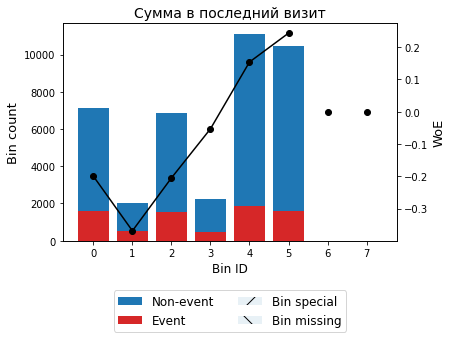

In [52]:
optb.binning_table.plot(metric="woe")

In [53]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.11340542
    IV (Jeffrey)             0.04381834
    JS (Jensen-Shannon)      0.00546342
    Hellinger                0.00547034
    Triangular               0.02179862
    KS                       0.09973488
    HHI                      0.21403233
    HHI (normalized)         0.10175123
    Cramer's V               0.08237451
    Quality score            0.15695378

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1     8.347142 0.003863  0.001458  0.998542
        1      2     7.773109 0.005303  0.997198  0.002802
        2      3     6.355129 0.011704  0.995261  0.004739
        3      4    12.441791 0.000420  0.999749  0.000251
        4      5     5.786344 0.016151  0.992363  0.007637



In [54]:
X_transform = binning_process.transform(X, metric="woe")
X_transform

Сумма в последний визит  Разнообразие товаров  \
0                     0.153670              1.008056   
1                     0.243059              1.008056   
2                     0.243059              1.008056   
3                     0.153670             -0.725611   
4                     0.243059              1.008056   
...                        ...                   ...   
39901                 0.153670              1.008056   
39902                 0.153670              1.008056   
39903                -0.199926              1.008056   
39904                 0.153670             -0.725611   
39905                 0.243059             -0.237526   

       Разнообразие товарных групп  R (Давность)  F (частота)  M (сумма)  \
0                         1.037051      1.995064     1.027215   0.578385   
1                         1.037051     -0.941668     1.027215   0.244891   
2                         1.037051      0.474289     1.027215   0.244891   
3                         0.180484     -0.941668    -0.430533  -0.724514   
4                         1.037051      1.995064     1.027215   0.244891   
...                            ...           ...          ...        ...   
39901                     1.037051      1.141576     1.027215   0.578385   
39902                     1.037051      1.995064     1.027215   0.578385   
39903                     1.037051     -0.161004     1.027215   0.578385   
39904                    -1.329262     -1.745033    -1.561158  -0.724514   
39905                    -0.213868      0.474289     0.061899  -0.264497   

       Макс сумма за визит  Любимая группа в посл визит  \
0                 0.171955                     0.077987   
1                -0.156186                     1.392348   
2                -0.156186                     0.944699   
3                -0.379571                    -0.406701   
4                -0.379571                     0.216263   
...                    ...                          ...   
39901             0.171955                     1.392348   
39902             0.171955                     1.392348   
39903             0.171955                     0.077987   
39904            -0.156186                     0.216263   
39905            -0.156186                     0.077987   

       Количество визитов в выходные  
0                           0.812011  
1                           0.812011  
2                           0.812011  
3                          -0.992362  
4                           0.812011  
...                              ...  
39901                      -0.168352  
39902                       0.812011  
39903                       0.812011  
39904                      -1.740154  
39905                      -0.168352  

[39906 rows x 9 columns]

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


In [56]:
binning_process.fit(Xtest,Ytest)

BinningProcess(max_n_bins=6, selection_criteria={'iv': {'min': 0.02}},
               variable_names=['Сумма в последний визит',
                               'Разнообразие товаров',
                               'Разнообразие товарных групп', 'R (Давность)',
                               'F (частота)', 'M (сумма)',
                               'Макс сумма за визит',
                               'Любимая группа в посл визит',
                               'Количество визитов в выходные'])

In [57]:
binning_process.information(print_level=2)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                             6   * U
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                 no   * d
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  411

In [58]:
binning_process.summary()

name        dtype   status  selected n_bins  \
0        Сумма в последний визит    numerical  OPTIMAL      True      6   
1           Разнообразие товаров    numerical  OPTIMAL      True      6   
2    Разнообразие товарных групп    numerical  OPTIMAL      True      6   
3                   R (Давность)    numerical  OPTIMAL      True      6   
4                    F (частота)    numerical  OPTIMAL      True      6   
5                      M (сумма)    numerical  OPTIMAL      True      6   
6            Макс сумма за визит    numerical  OPTIMAL      True      6   
7    Любимая группа в посл визит  categorical  OPTIMAL      True      6   
8  Количество визитов в выходные    numerical  OPTIMAL      True      6   

         iv        js      gini quality_score  
0  0.056014  0.006979  0.130278      0.192433  
1  0.653319  0.076856  0.431051      0.620515  
2  0.616426  0.073325  0.424119      0.687664  
3  1.195691  0.133263  0.559266      0.048541  
4  0.674272  0.079308  0.438266      0.590357  
5  0.465815  0.055717  0.368739      0.880802  
6  0.159997  0.019654  0.218819      0.560105  
7  0.289565  0.035076  0.269286      0.745502  
8  0.628824  0.073705  0.410138      0.643566

In [59]:
optb = binning_process.get_binned_variable('Сумма в последний визит')

In [60]:
optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 313.50)   9294   0.225604       7192   2102    0.226167   
1         [313.50, 404.50)   2249   0.054593       1676    573    0.254780   
2         [404.50, 941.50)   7768   0.188562       6094   1674    0.215499   
3        [941.50, 1435.50)   5139   0.124745       4237    902    0.175521   
4       [1435.50, 5084.50)  11470   0.278425       9705   1765    0.153880   
5           [5084.50, inf)   5276   0.128071       4518    758    0.143669   
6                  Special      0   0.000000          0      0    0.000000   
7                  Missing      0   0.000000          0      0    0.000000   
Totals                      41196   1.000000      33422   7774    0.188708   

             WoE        IV        JS  
0       -0.22835  0.012605  0.001572  
1       -0.38515  0.009074  0.001127  
2      -0.166341  0.005489  0.000685  
3       0.088567  0.000952  0.000119  
4       0.246061  0.015585  0.001943  
5       0.326712  0.012309  0.001532  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            0.056014  0.006979

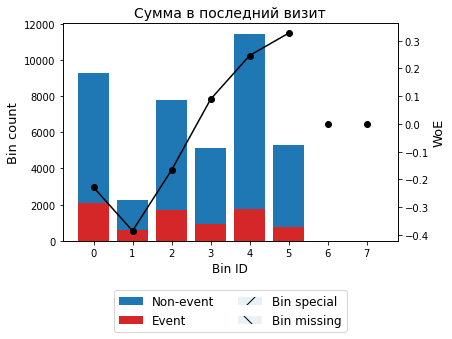

In [61]:
optb.binning_table.plot(metric="woe")

In [62]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.13027829
    IV (Jeffrey)             0.05601442
    JS (Jensen-Shannon)      0.00697889
    Hellinger                0.00699032
    Triangular               0.02782483
    KS                       0.11175967
    HHI                      0.19891732
    HHI (normalized)         0.08447694
    Cramer's V               0.09248301
    Quality score            0.19243346

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     8.326691 3.906676e-03  0.001413 9.985875e-01
        1      2    15.465517 8.402427e-05  0.999954 4.566176e-05
        2      3    30.944810 2.654711e-08  1.000000 4.350498e-11
        3      4    12.330645 4.455825e-04  0.999784 2.164797e-04
        4      5     2.944033 8.619527e-02  0.95

In [63]:
Xtest_transform = binning_process.transform(Xtest, metric="woe")
Xtest_transform

Сумма в последний визит  Разнообразие товаров  \
0                     0.246061              1.069221   
1                     0.246061              1.069221   
2                     0.326712              1.069221   
3                     0.246061             -0.589241   
4                     0.326712              1.069221   
...                        ...                   ...   
41191                 0.246061              1.069221   
41192                 0.246061              1.069221   
41193                 0.326712              1.069221   
41194                -0.166341             -0.589241   
41195                 0.326712             -0.081210   

       Разнообразие товарных групп  R (Давность)  F (частота)  M (сумма)  \
0                         1.046015      2.153916     1.084740   0.459357   
1                         1.046015     -0.306252     1.084740   0.459357   
2                         1.046015      0.906717     1.084740  -0.012577   
3                        -0.091594     -0.852521    -0.514490  -0.806384   
4                         1.046015      2.153916     1.084740  -0.012577   
...                            ...           ...          ...        ...   
41191                     1.046015      0.906717     1.084740   0.459357   
41192                     1.046015      2.153916     1.084740   0.459357   
41193                     1.046015     -0.852521     1.084740  -0.445115   
41194                    -1.446106     -1.617646    -1.608765  -0.806384   
41195                    -0.091594      0.906717    -0.040188  -0.012577   

       Макс сумма за визит  Любимая группа в посл визит  \
0                 0.199331                     0.082138   
1                -0.093329                     1.318257   
2                -0.304294                     0.978247   
3                -0.304294                    -0.416953   
4                -0.304294                     0.356645   
...                    ...                          ...   
41191             0.199331                     1.318257   
41192             0.199331                     1.318257   
41193            -0.304294                     0.082138   
41194            -0.093329                    -0.416953   
41195            -0.304294                     0.082138   

       Количество визитов в выходные  
0                           0.809754  
1                           0.809754  
2                           0.809754  
3                          -1.047147  
4                           0.809754  
...                              ...  
41191                      -0.151949  
41192                       0.809754  
41193                       0.809754  
41194                      -1.770140  
41195                      -0.151949  

[41196 rows x 9 columns]

In [64]:
logr = LogisticRegression().fit(X_transform, Y)
logr.coef_
logr_pred = logr.predict(Xtest_transform)

In [65]:
logr_proba = logr.predict_proba(Xtest_transform)
logr_proba

array([[0.97960547, 0.02039453],
       [0.8873107 , 0.1126893 ],
       [0.94986811, 0.05013189],
       ...,
       [0.78303899, 0.21696101],
       [0.25453654, 0.74546346],
       [0.90910597, 0.09089403]])

In [66]:
LOGR = roc_auc_score(Ytest, logr_proba[:,1]) 
LOGR

0.8056041312152381

In [67]:
fpr, tpr, thresholds = roc_curve(Ytest, logr_proba[:,1], drop_intermediate=False)

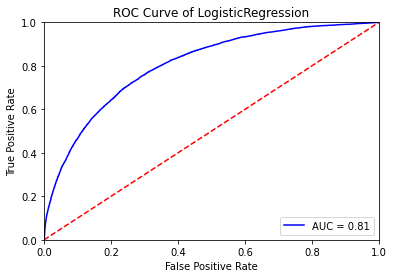

In [68]:
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % LOGR) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.title('ROC Curve of LogisticRegression') 
plt.show()